In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data.set_index('Unnamed: 0')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [6]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

# Data Visualization

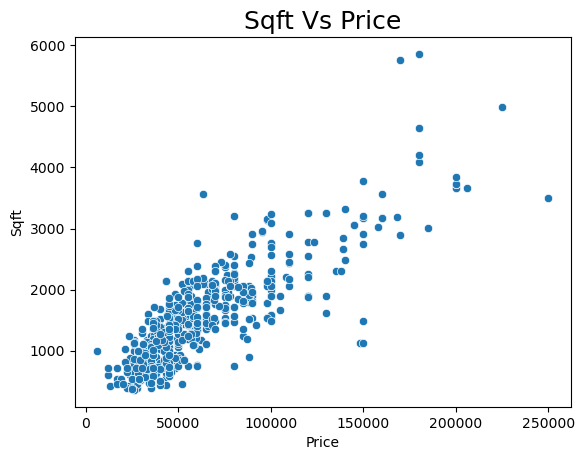

In [7]:
sns.scatterplot(x= data['Price'], y= data['Sqft'])
plt.title('Sqft Vs Price', fontsize = 18)
plt.show()

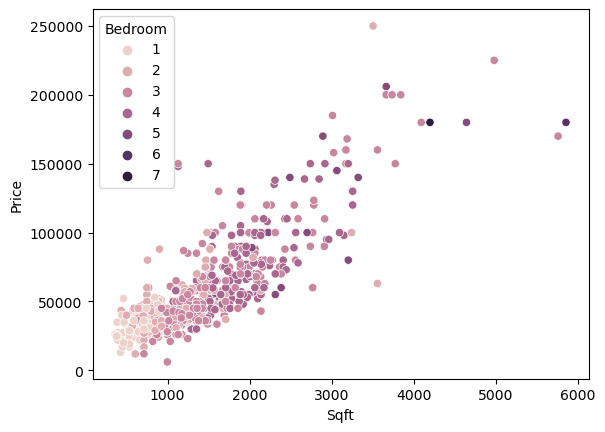

In [8]:
sns.scatterplot(data = data, x='Sqft', y='Price', hue='Bedroom')
plt.show()

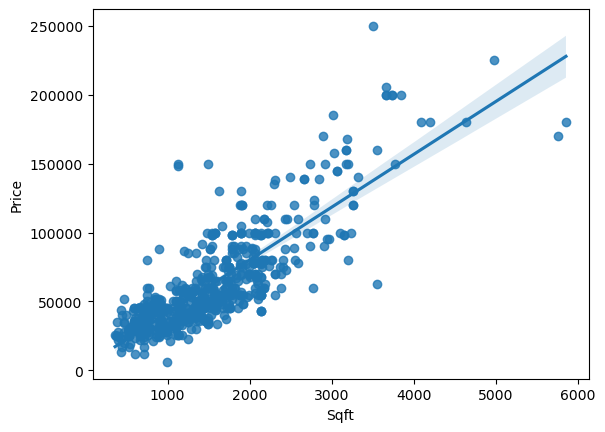

In [9]:
sns.regplot(data=data, x='Sqft', y='Price')
plt.show()

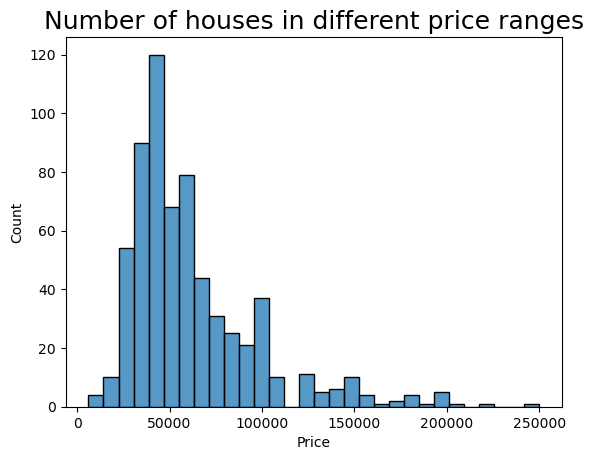

In [10]:
sns.histplot(x=data['Price'])
plt.title('Number of houses in different price ranges',fontsize= 18)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

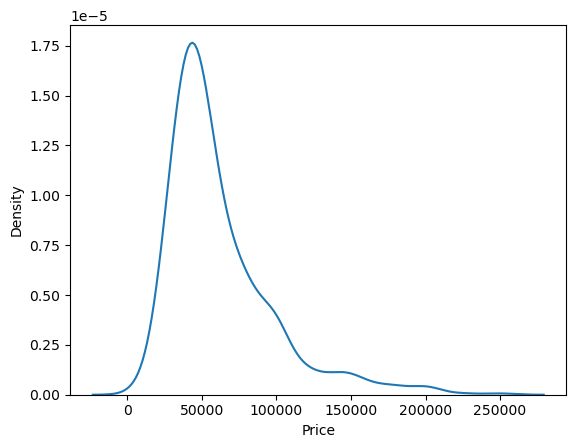

In [11]:
sns.kdeplot(x=data['Price'])

<Axes: ylabel='Density'>

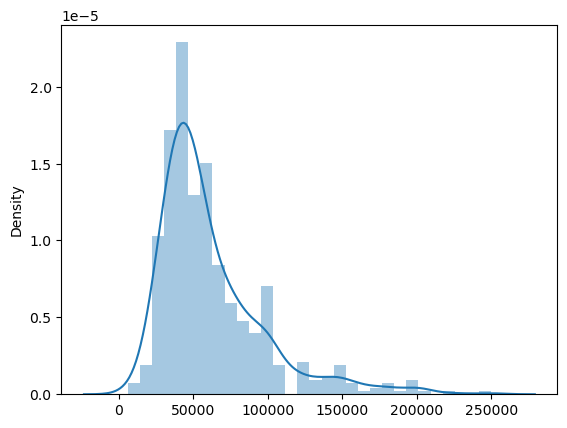

In [12]:
sns.distplot(x=data['Price'])

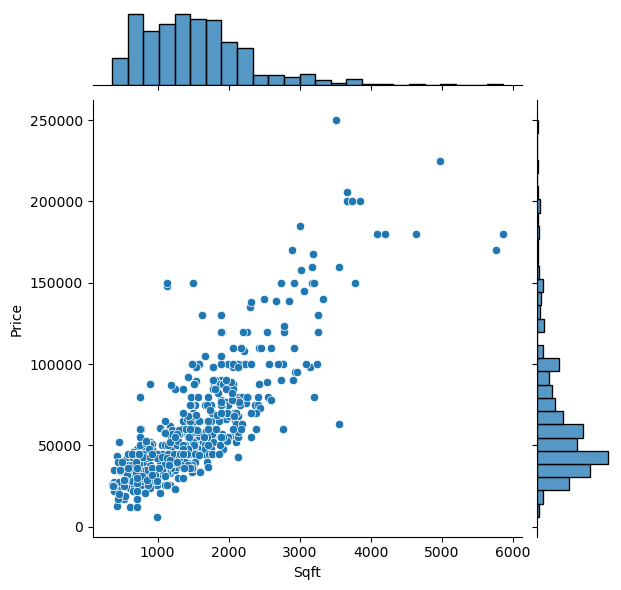

In [13]:
sns.jointplot(data = data, x='Sqft', y='Price')
plt.show()

<Axes: >

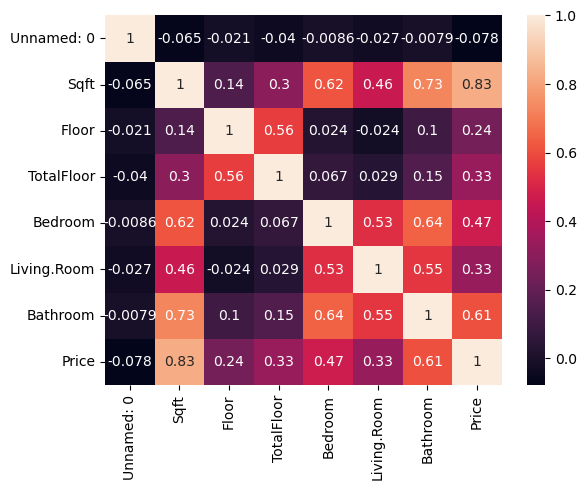

In [14]:
sns.heatmap(data.corr(),annot = True)

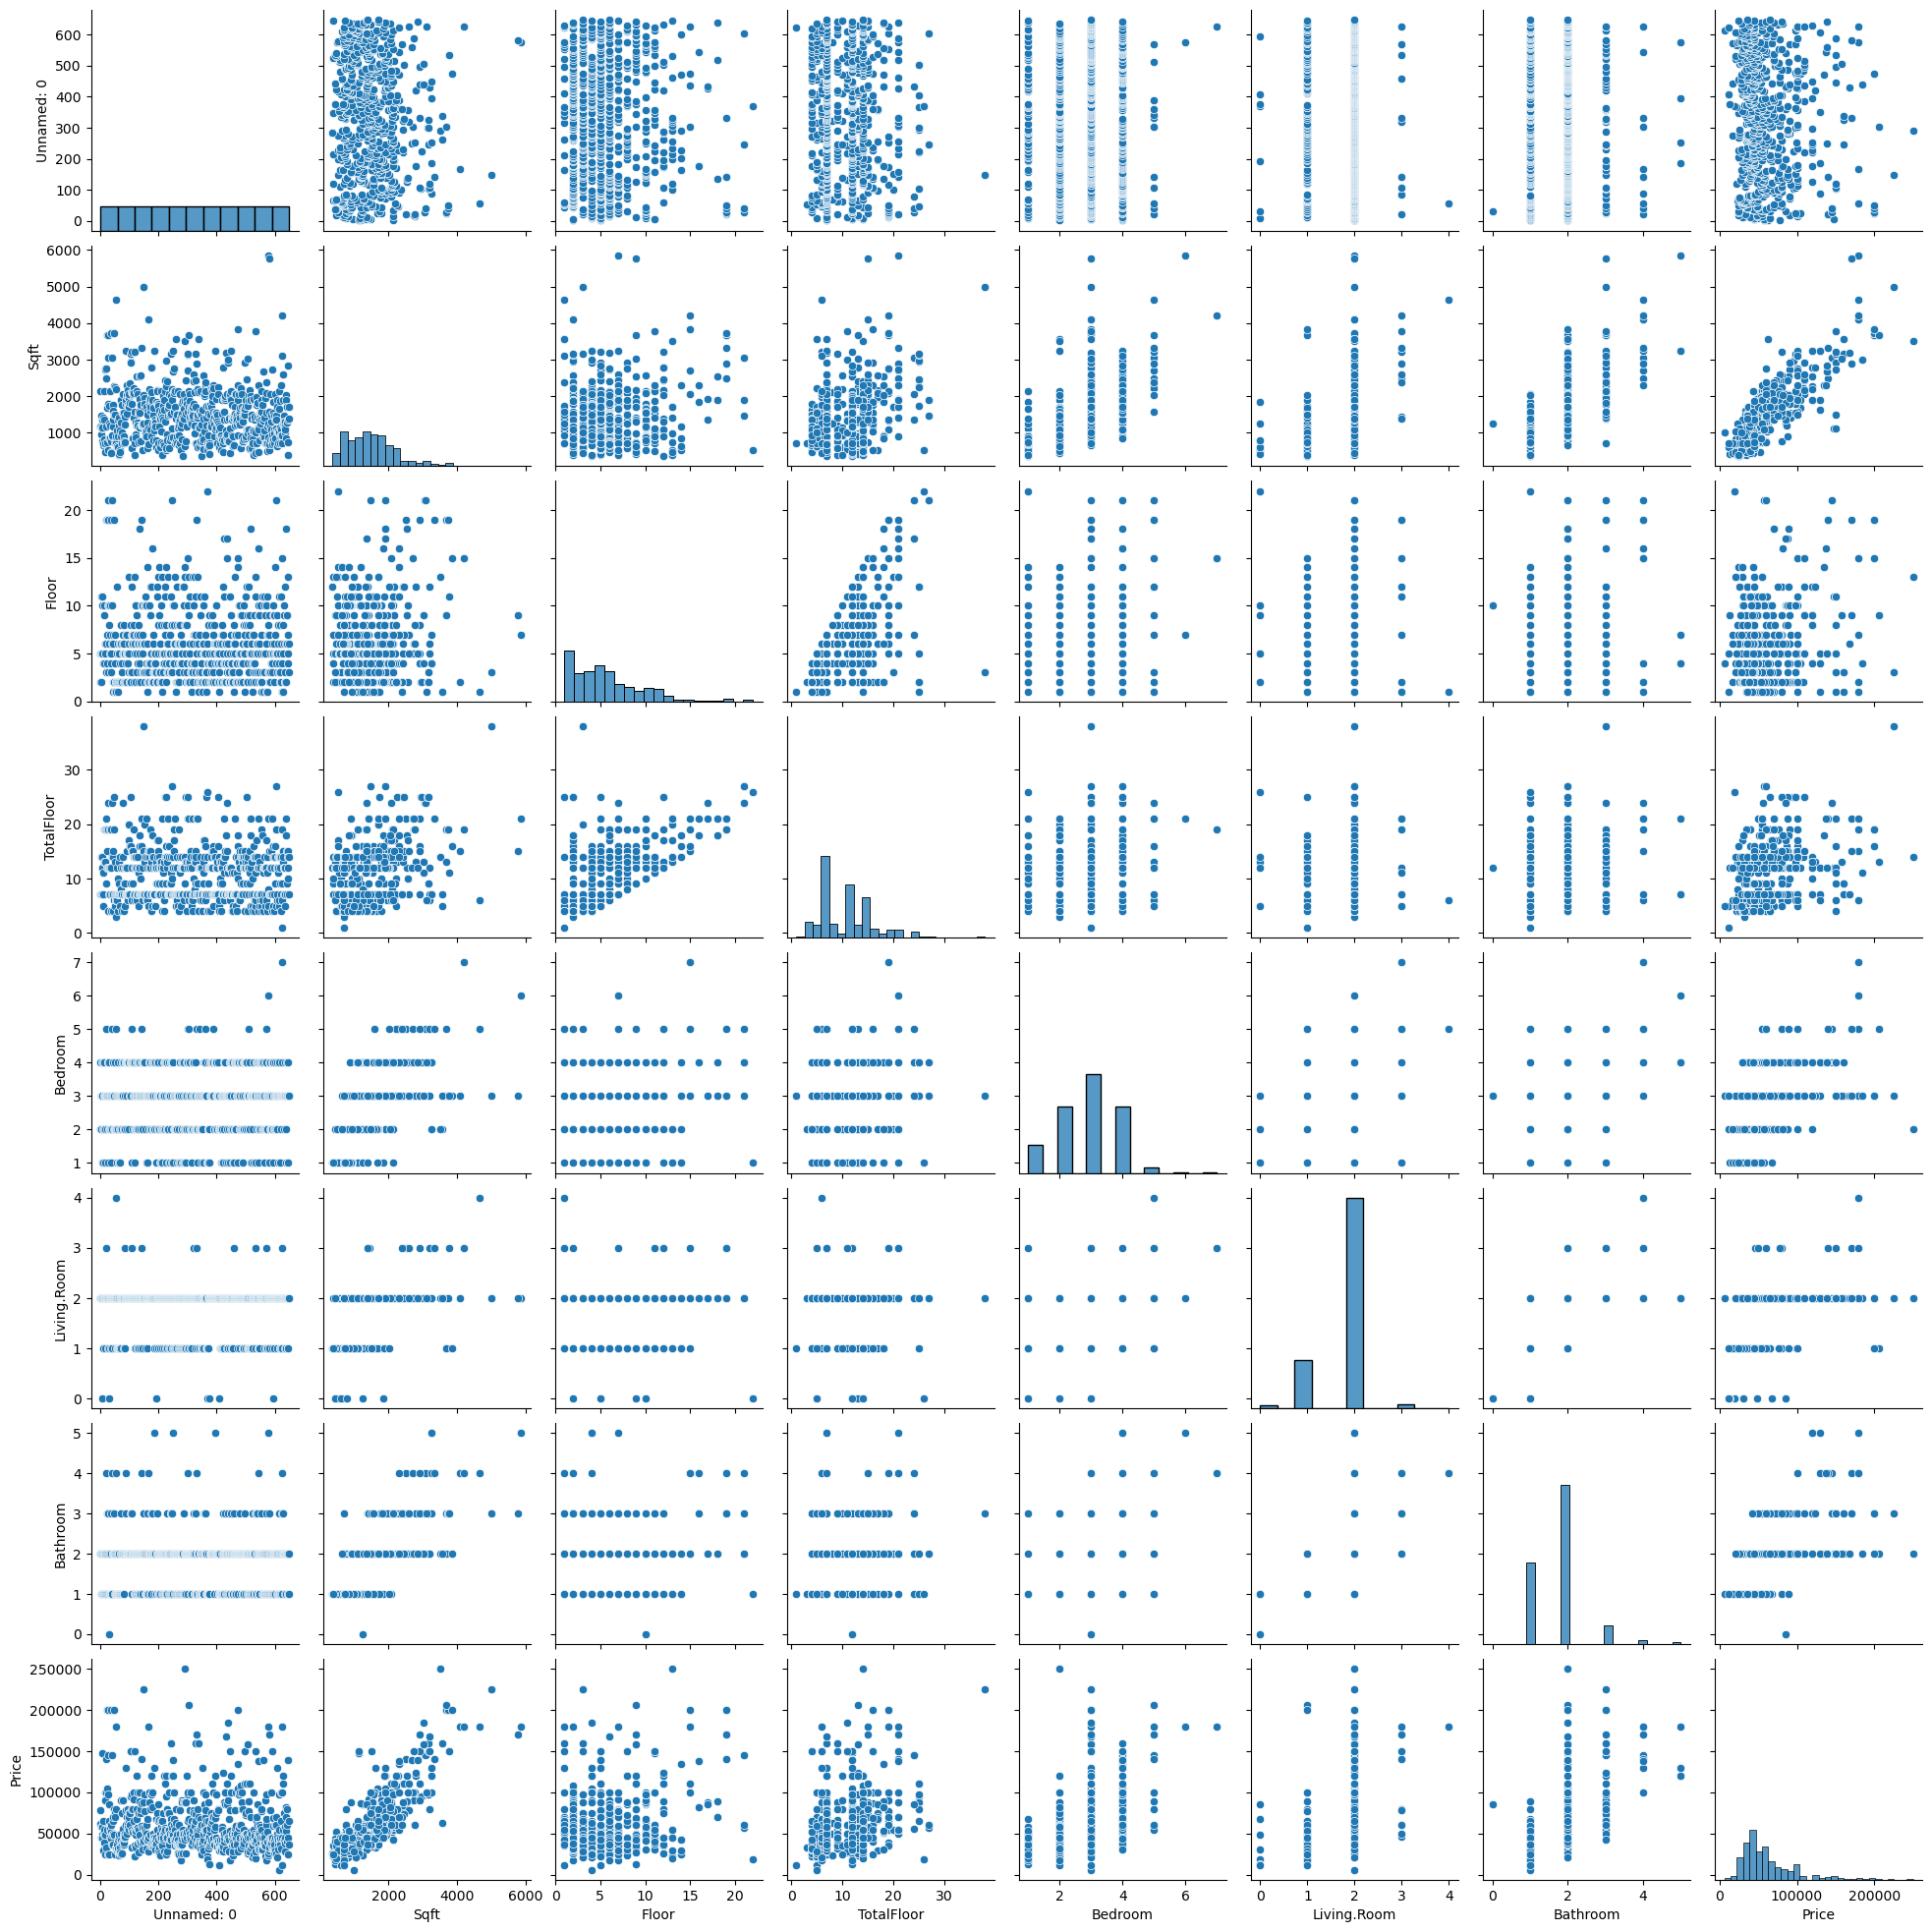

In [15]:
sns.pairplot(data=data)

# Separate the dataset into x and y

In [16]:
x = data.drop('Price',axis =1)
y = data['Price']

# Split x and y

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

# Apply KNN regression algorithm on x_train and y_train sets

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [19]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

# Prediction

In [20]:
y_pred = knr.predict(x_test)
y_pred

array([ 81799.8,  36400. ,  58600. ,  72200. ,  38360. , 122468.8,
       121200. ,  64400. ,  70800. ,  39200. ,  38800. ,  26200. ,
        34400. ,  52400. ,  38200. ,  97000. ,  36800. ,  23400. ,
        55400. ,  49399.6,  42000.4, 179200. ,  79200. ,  77399.8,
        70000. ,  98000. ,  73000. ,  46959.6,  76399.8,  50624. ,
        77999.6,  33560. ,  78800. ,  87599.8,  44624. ,  35500. ,
        67999.8,  86599.8,  41200. ,  54560. ,  45200. ,  40200. ,
        78200. ,  44624. ,  64400. ,  50377.6,  58600. ,  36700. ,
       193000. ,  58600. , 173800. ,  61000. ,  42360. ,  40700. ,
        59497.6,  86999.8,  60399.8,  63999.8, 101000. ,  72800. ,
        68000. ,  74999.6,  43000.4,  36800. ,  86599.8,  95200. ,
        48560. ,  33800. ,  41400. ,  34200. ,  29200. ,  64699.8,
        57200. ,  61000. ,  70000. ,  36006.8,  34960. ,  36200. ,
        83000. ,  40200. ,  66599.8,  50200. ,  93200. ,  38200. ,
        58599.8,  41200. ,  89000. ,  70600. ,  46755. ,  3520

# Evaluation

In [21]:
# To find accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.640292526301879

- This cannot be considered as a good model because the accuracy is less than 70%.

# To find a better value for K :

- The default value of K is 5 and default metric distance is Minkowski.
- n_neighbors = 5
- p=2
- metric= Minkowski

In [22]:
data.shape

(645, 8)

In [23]:
K = np.sqrt(645)   # 645 is the total number of rows
K

25.39685019840059

- K should be odd be an odd value.
- Also K should be less than or equal to the calculated value.

- From the calculations, we can take the value of K as 25.

# Apply KNN regression algorithm

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 25)
knr

KNeighborsRegressor(n_neighbors=25)

In [25]:
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=25)

In [26]:
y_pred = knr.predict(x_test)
y_pred

array([103573.68,  36696.  ,  64579.96,  82199.92,  38616.  , 108013.64,
       123498.16,  68719.92,  60592.8 ,  41263.92,  42616.8 ,  33784.  ,
        31968.76,  53452.8 ,  37236.  ,  90239.96,  40575.52,  34592.  ,
        63899.92,  50579.8 ,  38763.76, 151399.92,  83520.  ,  73239.96,
        71239.96,  86040.  ,  69159.96,  50211.28,  74559.96,  56884.8 ,
        80919.92,  32179.52,  79840.  , 103853.72,  54584.8 ,  34836.  ,
        69679.92,  73239.92,  46664.8 ,  55071.28,  52324.8 ,  39712.  ,
        81800.  ,  53764.8 ,  76159.92,  43866.52,  66119.96,  36392.  ,
       152799.92,  65519.96, 146799.92,  63219.96,  39816.  ,  38172.  ,
        57671.36,  70599.96,  75719.92,  57579.84, 102738.16,  84119.96,
        75359.92,  76519.92,  38483.76,  37024.  ,  77959.92,  98693.68,
        40784.  ,  43362.04,  38412.  ,  34093.32,  34324.  ,  59015.88,
        66400.  ,  64139.96,  72599.96,  37354.44,  34224.  ,  44384.8 ,
        90079.96,  46426.52,  60263.88,  41272.  , 

In [27]:
# for accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6781450051910124